In [1]:
import pandas as pd
import pm4py

In [7]:
df = pd.read_csv("data/Pizza_Event.csv", sep=',')


In [8]:
df

,_CASE_KEY,SORTING,EVENTTIME,ACTIVITY_EN,Automation
0,1,1,15.06.18 09:37,Order by phone,A
1,1,2,15.06.18 09:40,Start preparing pizza,A
2,1,3,15.06.18 09:45,Call Customer,A
3,1,4,15.06.18 09:46,Start preparing pizza,A
4,1,5,15.06.18 09:53,Start baking pizza,B
...,...,...,...,...,...
15804,2000,15805,26.07.18 08:14,Order at the counter (shop),A
15805,2000,15806,26.07.18 08:14,Start preparing pizza,A
15806,2000,15807,26.07.18 08:21,Start baking pizza,A
15807,2000,15808,26.07.18 08:32,Baking pizza ready,A


In [10]:
df = pm4py.format_dataframe(df, case_id="_CASE_KEY", activity_key="ACTIVITY_EN", timestamp_key="EVENTTIME")

/Users/passion/IIS/IIS Semester 5/FWP_ProcessInt/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/passion/IIS/IIS Semester 5/FWP_ProcessInt/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/passion/IIS/IIS Semester 5/FWP_ProcessInt/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and a

In [11]:
df

,_CASE_KEY,SORTING,EVENTTIME,ACTIVITY_EN,Automation,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,1,2018-06-15 09:37:00+00:00,Order by phone,A,1,Order by phone,2018-06-15 09:37:00+00:00,0,0
1,1,2,2018-06-15 09:40:00+00:00,Start preparing pizza,A,1,Start preparing pizza,2018-06-15 09:40:00+00:00,1,0
2,1,3,2018-06-15 09:45:00+00:00,Call Customer,A,1,Call Customer,2018-06-15 09:45:00+00:00,2,0
3,1,4,2018-06-15 09:46:00+00:00,Start preparing pizza,A,1,Start preparing pizza,2018-06-15 09:46:00+00:00,3,0
4,1,5,2018-06-15 09:53:00+00:00,Start baking pizza,B,1,Start baking pizza,2018-06-15 09:53:00+00:00,4,0
...,...,...,...,...,...,...,...,...,...,...
15804,999,7983,2018-02-16 23:42:00+00:00,Order at the counter (shop),A,999,Order at the counter (shop),2018-02-16 23:42:00+00:00,15804,1825
15805,999,7984,2018-02-16 23:44:00+00:00,Start preparing pizza,A,999,Start preparing pizza,2018-02-16 23:44:00+00:00,15805,1825
15806,999,7985,2018-02-16 23:47:00+00:00,Baking pizza ready,A,999,Baking pizza ready,2018-02-16 23:47:00+00:00,15806,1825
15807,999,7986,2018-02-16 23:47:00+00:00,Start baking pizza,A,999,Start baking pizza,2018-02-16 23:47:00+00:00,15807,1825


In [13]:
event_log = pm4py.convert_to_event_log(df)

/Users/passion/IIS/IIS Semester 5/FWP_ProcessInt/.venv/lib/python3.11/site-packages/pm4py/utils.py:508: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [14]:
event_log

[{'attributes': {'concept:name': '1'}, 'events': [{'_CASE_KEY': 1, 'SORTING': 1, 'EVENTTIME': Timestamp('2018-06-15 09:37:00+0000', tz='UTC'), 'ACTIVITY_EN': 'Order by phone', 'Automation': 'A', 'concept:name': 'Order by phone', 'time:timestamp': Timestamp('2018-06-15 09:37:00+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}, '..', {'_CASE_KEY': 1, 'SORTING': 10, 'EVENTTIME': Timestamp('2018-06-15 10:06:00+0000', tz='UTC'), 'ACTIVITY_EN': 'Payment customer', 'Automation': 'A', 'concept:name': 'Payment customer', 'time:timestamp': Timestamp('2018-06-15 10:06:00+0000', tz='UTC'), '@@index': 9, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': '999'}, 'events': [{'_CASE_KEY': 999, 'SORTING': 7983, 'EVENTTIME': Timestamp('2018-02-16 23:42:00+0000', tz='UTC'), 'ACTIVITY_EN': 'Order at the counter (shop)', 'Automation': 'A', 'concept:name': 'Order at the counter (shop)', 'time:timestamp': Timestamp('2018-02-16 23:42:00+0000', tz='UTC'), '@@index': 15804, '@@case_index': 1825}, 

In [15]:
process_model = pm4py.discover_bpmn_inductive(event_log)


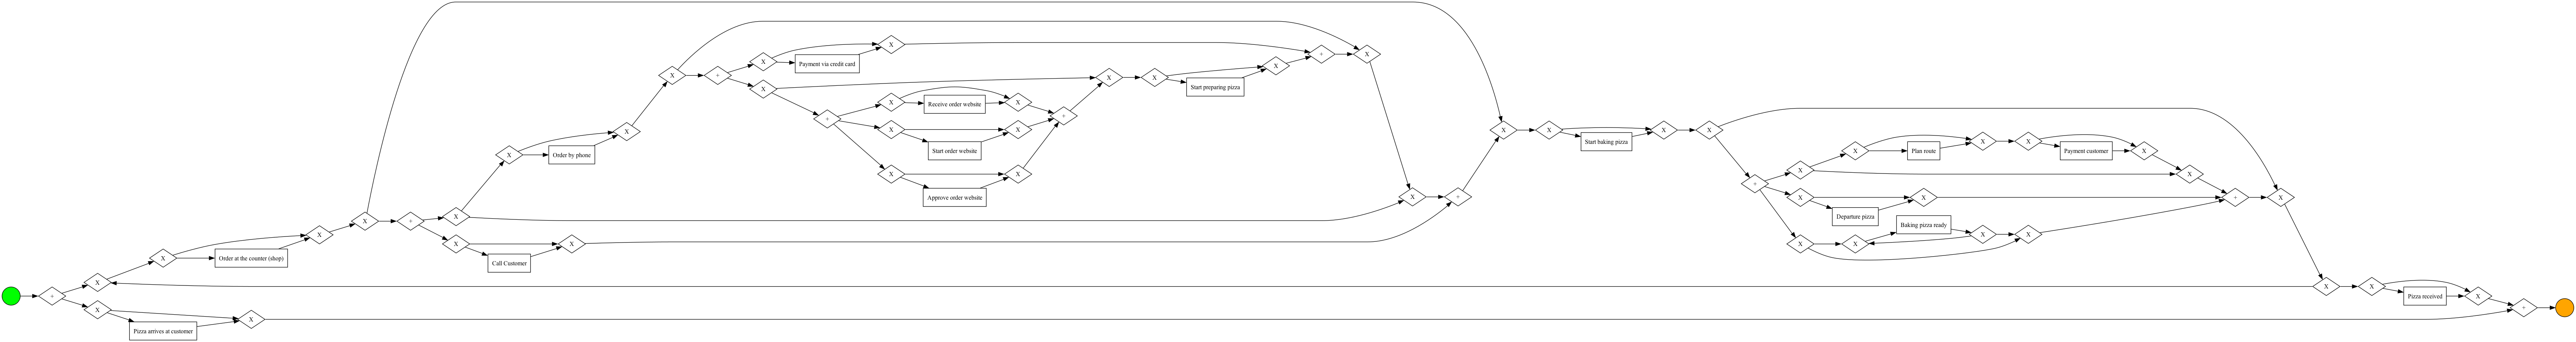

In [16]:
pm4py.view_bpmn(process_model)

In [17]:
pm4py.vis.view_petri_net(process_model)

AttributeError: 'BPMN' object has no attribute 'name'

In [19]:
event_log

[{'attributes': {'concept:name': '1'}, 'events': [{'_CASE_KEY': 1, 'SORTING': 1, 'EVENTTIME': Timestamp('2018-06-15 09:37:00+0000', tz='UTC'), 'ACTIVITY_EN': 'Order by phone', 'Automation': 'A', 'concept:name': 'Order by phone', 'time:timestamp': Timestamp('2018-06-15 09:37:00+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}, '..', {'_CASE_KEY': 1, 'SORTING': 10, 'EVENTTIME': Timestamp('2018-06-15 10:06:00+0000', tz='UTC'), 'ACTIVITY_EN': 'Payment customer', 'Automation': 'A', 'concept:name': 'Payment customer', 'time:timestamp': Timestamp('2018-06-15 10:06:00+0000', tz='UTC'), '@@index': 9, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': '999'}, 'events': [{'_CASE_KEY': 999, 'SORTING': 7983, 'EVENTTIME': Timestamp('2018-02-16 23:42:00+0000', tz='UTC'), 'ACTIVITY_EN': 'Order at the counter (shop)', 'Automation': 'A', 'concept:name': 'Order at the counter (shop)', 'time:timestamp': Timestamp('2018-02-16 23:42:00+0000', tz='UTC'), '@@index': 15804, '@@case_index': 1825}, 

In [21]:
pm4py.write.write_xes(event_log, "data/Pizza_Case.xes")

/Users/passion/IIS/IIS Semester 5/FWP_ProcessInt/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
exporting log, completed traces :: 100%|██████████| 1826/1826 [00:00<00:00, 5908.83it/s]
